In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
from datetime import date, datetime


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_DA_US = df[(df['job_title']=='Data Analyst') &(df['job_country']=='United States')].copy()


In [15]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [17]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending = False)
#df_DA_skills = df_DA_skills.head(10)
df_DA_skills= df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count *100

df_DA_skillstop = df_DA_skills[df_DA_skills['skill_percent'] > 5]

df_DA_skillstop

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


In [13]:
DA_job_count

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
3237,Data Analyst,Data Analyst,"Washington, DC",via Indeed,Full-time,False,"New York, United States",2023-03-21 13:16:36,False,True,United States,year,120000.0,NaN,Delaware Nation Industries,"[sql, visio, outlook, word, excel, powerpoint,...","{'analyst_tools': ['visio', 'outlook', 'word',..."
3807,Data Analyst,Data Analyst,"Jacksonville, FL",via LinkedIn,Contractor,False,"Florida, United States",2023-02-28 13:03:33,True,False,United States,year,117500.0,NaN,Brooksource,"[sql, sql server, ssrs, ssis]","{'analyst_tools': ['ssrs', 'ssis'], 'databases..."
5182,Data Analyst,Data Analyst,"Melville, NY",via LinkedIn,Full-time,False,"New York, United States",2023-06-14 13:00:08,False,False,United States,year,85000.0,NaN,MATRIX Resources,"[sql, azure, jira]","{'async': ['jira'], 'cloud': ['azure'], 'progr..."
5839,Data Analyst,Data Analyst,"New York, NY",via Adzuna,Full-time,False,"New York, United States",2023-02-13 12:59:57,False,False,United States,year,67500.0,NaN,Universal,"[python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775088,Data Analyst,Data Analyst,Anywhere,via Invitae - Talentify,Full-time,True,"California, United States",2023-04-14 01:01:03,True,True,United States,year,76500.0,NaN,Invitae,"[sql, spring, excel, sheets, tableau, looker]","{'analyst_tools': ['excel', 'sheets', 'tableau..."
776063,Data Analyst,Data Analyst,"Santa Monica, CA",via Indeed,Full-time,False,"California, United States",2023-11-23 01:01:14,False,True,United States,year,82500.0,NaN,KCRW Inc,"[sql, python, r, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
776762,Data Analyst,Data Analyst,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-08-14 05:01:25,True,True,United States,year,118050.0,NaN,Square,"[sql, c, go, snowflake, bigquery, aws, gcp, ai...","{'analyst_tools': ['looker', 'tableau', 'power..."
777764,Data Analyst,Data Analyst,"St. Petersburg, FL",via WOWKtv Jobs,Full-time,False,"Florida, United States",2023-01-03 05:02:12,False,False,United States,year,105515.0,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."


/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_84215/3994192748.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.append(plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt))
/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_84215/3994192748.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


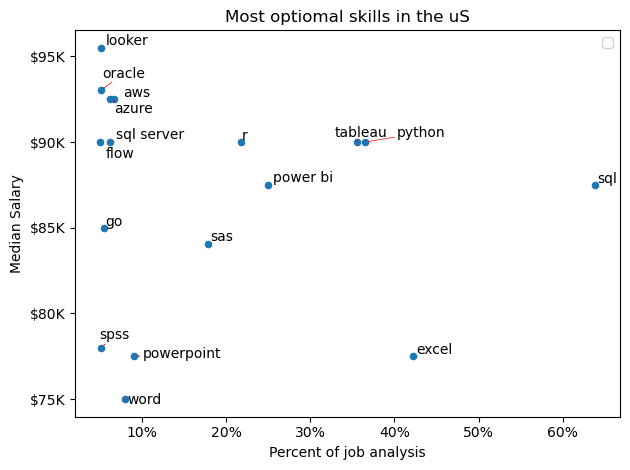

In [28]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#fig , ax = plt.subplots()
df_DA_skillstop.plot(kind='scatter', x='skill_percent', y='median_salary')
text =[]

for i, txt in enumerate(df_DA_skillstop.index):
    text.append(plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt))
adjust_text(text,
            arrowprops=dict(arrowstyle='->', color='red', linewidth=0.5))
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}K".format(int(x/1000))))
    #adjust_text([plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt, fontsize=9) 
                # for i, txt in enumerate(df_DA_skillstop.index)],
            #arrowprops=dict(arrowstyle='->', color='red'))
#plt.text(50000,90000,"bhp", fontsize=9)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend()
plt.title(f'Most optiomal skills in the uS')
plt.xlabel('Percent of job analysis')
plt.ylabel('Median Salary')
plt.grid(False)
plt.tight_layout()
plt.show()

In [31]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict: #if key exists then add only value to the existing dict
            technology_dict[key]+=value
        else: # if key doesn't exist then add key and value to the existing dict
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
technology_dict

{'analyst_tools': ['power bi',
  'nuix',
  'sheets',
  'powerbi',
  'ssis',
  'alteryx',
  'cognos',
  'sas',
  'outlook',
  'msaccess',
  'dax',
  'looker',
  'spss',
  'datarobot',
  'sap',
  'splunk',
  'spreadsheet',
  'microstrategy',
  'qlik',
  'ms access',
  'word',
  'tableau',
  'powerpoint',
  'ssrs',
  'visio',
  'excel',
  'esquisse',
  'sharepoint'],
 'programming': ['kotlin',
  'julia',
  'cobol',
  'objective-c',
  'java',
  'sql',
  'bash',
  'typescript',
  'apl',
  'sas',
  'visual basic',
  'delphi',
  'perl',
  'ocaml',
  'elixir',
  'ruby',
  'dart',
  'css',
  'f#',
  'powershell',
  'pascal',
  'mongodb',
  'vba',
  'c',
  'nosql',
  'scala',
  'golang',
  'no-sql',
  'groovy',
  'rust',
  'fortran',
  'vb.net',
  'haskell',
  'c#',
  'lua',
  'assembly',
  'javascript',
  'matlab',
  'solidity',
  'python',
  'clojure',
  'swift',
  'crystal',
  'visualbasic',
  'html',
  'lisp',
  'go',
  't-sql',
  'r',
  'c++',
  'shell',
  'mongo',
  'sass',
  'erlang',
  '

In [30]:
df['job_type_skills'].head(10)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [33]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,nuix
0,analyst_tools,sheets
0,analyst_tools,powerbi
0,analyst_tools,ssis
...,...,...
9,sync,slack
9,sync,rocketchat
9,sync,twilio
9,sync,webex


In [35]:
df_plot = df_DA_skillstop.merge(df_technology, left_on='job_skills', right_on='skills')

/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_84215/2935380043.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.append(plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt))


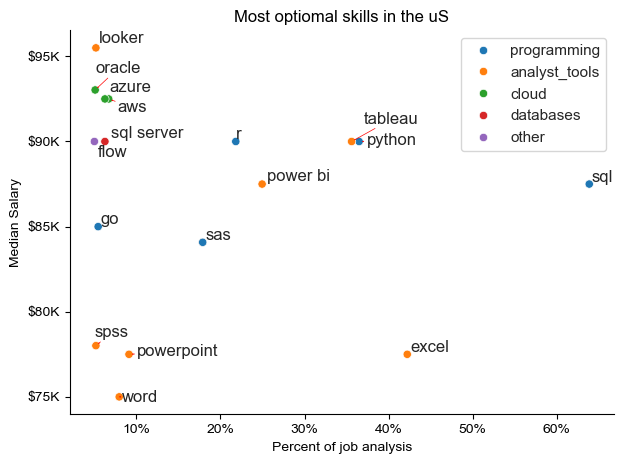

In [40]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#fig , ax = plt.subplots()
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data = df_plot,
    x='skill_percent',
    y='median_salary',
    hue ='technology'
)
sns.set_theme(style='ticks')
sns.despine()
text =[]

for i, txt in enumerate(df_DA_skillstop.index):
    text.append(plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt))
adjust_text(text,
            arrowprops=dict(arrowstyle='->', color='red', linewidth=0.5))
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}K".format(int(x/1000))))
    #adjust_text([plt.text(df_DA_skillstop['skill_percent'][i], df_DA_skillstop['median_salary'][i], txt, fontsize=9) 
                # for i, txt in enumerate(df_DA_skillstop.index)],
            #arrowprops=dict(arrowstyle='->', color='red'))
#plt.text(50000,90000,"bhp", fontsize=9)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend()
plt.title(f'Most optiomal skills in the uS')
plt.xlabel('Percent of job analysis')
plt.ylabel('Median Salary')
plt.grid(False)
plt.tight_layout()
plt.show()